## Практична робота 8

### Завдання

Розробити за допомогою бібліотеки surprise рекомендаційну систему.

In [ ]:
from surprise import Dataset, Reader, SVD, SVDpp, NMF, KNNBasic, CoClustering
from surprise.model_selection import cross_validate
import matplotlib.pyplot as plt

Використати датасет movielens-100k

In [ ]:
data = Dataset.load_builtin('ml-100k')

Використайте алгоритми SVD, SVDpp, NMF  + ще два на власний вибір.    
Найкращі параметри для всіх алгоритмів підберіть за допомогою крос-валідації.

In [ ]:
algo_svd = SVD()
algo_svdpp = SVDpp()
algo_nmf = NMF()
algo_knnbasic = KNNBasic()
algo_coclustering = CoClustering()

In [ ]:
cv_svd = cross_validate(algo_svd, data, measures=['RMSE'], cv=5, verbose=True)
cv_svdpp = cross_validate(algo_svdpp, data, measures=['RMSE'], cv=5, verbose=True)
cv_nmf = cross_validate(algo_nmf, data, measures=['RMSE'], cv=5, verbose=True)
cv_knnbasic = cross_validate(algo_knnbasic, data, measures=['RMSE'], cv=5, verbose=True)
cv_coclustering = cross_validate(algo_coclustering, data, measures=['RMSE'], cv=5, verbose=True)

Evaluating RMSE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9400  0.9285  0.9393  0.9407  0.9373  0.9372  0.0045  
Fit time          0.35    0.37    0.37    0.34    0.35    0.36    0.01    
Test time         0.05    0.08    0.05    0.08    0.05    0.06    0.01    
Evaluating RMSE of algorithm SVDpp on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9207  0.9255  0.9112  0.9218  0.9166  0.9192  0.0049  
Fit time          9.03    9.01    8.98    8.98    8.94    8.99    0.03    
Test time         1.45    1.45    1.44    1.42    1.44    1.44    0.01    
Evaluating RMSE of algorithm NMF on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9578  0.9667  0.9740  0.9758  0.9529  0.9654  0.0089  
Fit time          0.51    0.50    0.50    0.51    0.50    0.51    0.00    
Test time         0.04    

Обчисліть середнє значення середньоквадратичної помилки RMSE для кожного алгоритму на основі результатів крос-валідації.   
Зазвичай, алгоритм з найменшим значенням RMSE вважається найкращим для даного завдання рекомендації.

In [ ]:
svd_rmse = cv_svd['test_rmse'].mean()
svdpp_rmse = cv_svdpp['test_rmse'].mean()
nmf_rmse = cv_nmf['test_rmse'].mean()
knnbasic_rmse = cv_knnbasic['test_rmse'].mean()
coclustering_rmse = cv_coclustering['test_rmse'].mean()

print("SVD RMSE:", svd_rmse)
print("SVD++ RMSE:", svdpp_rmse)
print("NMF RMSE:", nmf_rmse)
print("KNNBasic RMSE:", knnbasic_rmse)
print("CoClustering RMSE:", coclustering_rmse)

SVD RMSE: 0.9371770698936619
SVD++ RMSE: 0.919158253375814
NMF RMSE: 0.9654475537108537
KNNBasic RMSE: 0.9784140202849054
CoClustering RMSE: 0.9615993793877999


Виберіть оптимальний алгоритм. Зробіть візуалізацію.  

Алгоритм SVD++(SVPpp) видав найменшу сердньоквадратичну помилку, тому далі будемо використовувати саме його.

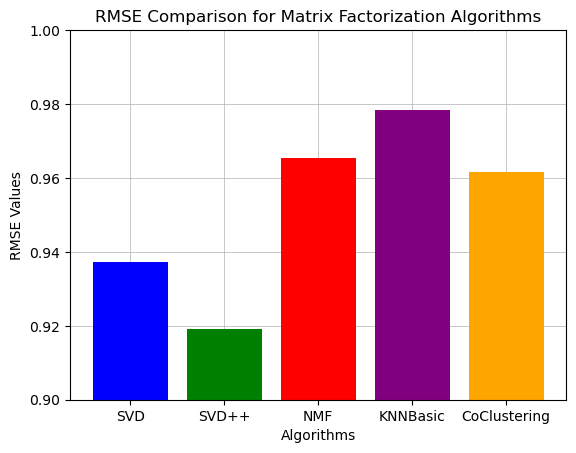

In [ ]:
rmse_values = [svd_rmse, svdpp_rmse, nmf_rmse, knnbasic_rmse, coclustering_rmse]
algos = ['SVD', 'SVD++', 'NMF', 'KNNBasic', 'CoClustering']
plt.bar(algos, rmse_values, color=['blue', 'green', 'red', 'purple', 'orange'])
plt.xlabel('Algorithms')
plt.ylabel("RMSE Values")
plt.title('RMSE Comparison for Matrix Factorization Algorithms')
plt.ylim(0.9, 1.0)
plt.gca().set_axisbelow(True)
plt.grid(linewidth=0.5)
plt.show()

Під час виконання Практичної роботи №8 ми досліджували та використовували методи для створення рекомендаційних систем, таких як SVD, SVD++, NMF, KNNBasic та CoClustering. Основна мета роботи полягала в освоєнні принципів цих алгоритмів та їхніх можливих застосувань. У процесі роботи ми також вивчили визначення RMSE для кожного алгоритму на підставі результатів крос-валідації та покращили навички в побудові та аналізі графіків.